In [286]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [287]:
testperson = 2

In [288]:
warnings.filterwarnings('ignore') 
file = "../eye_tracking_expiriment\data\gaze_data_Alexander_2.csv" 
gaze = pd.read_csv(file)
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.271391,1,1,-17.671755,21.731960,721.701294,49.670483,20.569616,720.199829,0.534540,...,2.650803,2.696045,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
1,0.281550,1,1,-17.698795,21.579380,721.634705,49.631058,20.480961,720.155457,0.534600,...,2.660782,2.699661,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
2,0.292763,1,1,-17.782404,21.420193,721.690125,49.537624,20.358677,720.220032,0.534765,...,2.661316,2.703247,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
3,0.302739,1,1,-17.947634,21.173506,721.423706,49.284355,20.149576,719.918152,0.535109,...,2.659225,2.731339,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
4,0.314703,1,1,-18.092159,20.973351,721.460754,49.180702,20.055531,719.952209,0.535397,...,2.656555,2.736115,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
5,0.325452,1,1,-18.189287,20.801245,721.231323,49.053574,19.921925,719.721680,0.535603,...,2.654587,2.735199,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
6,0.335831,1,1,-18.319096,20.618406,721.499146,48.939007,19.754179,720.058472,0.535850,...,2.649887,2.699493,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
7,0.348021,1,1,-18.376604,20.515953,721.616943,48.901695,19.691267,720.146973,0.535960,...,2.649918,2.694504,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
8,0.358985,1,1,-18.395281,20.463587,721.751709,48.884182,19.639534,720.289490,0.535991,...,2.655319,2.696320,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive
9,0.369230,1,1,-18.381914,20.421846,721.979919,48.918758,19.587521,720.561340,0.535954,...,2.665283,2.732559,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive


In [289]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(206190, 39)

In [290]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P02_text.txt', 'AI_HC_P02_MCQ.txt', 'AI_HC_P02_FIBQ.txt',
       'OR_HC_P02_text.txt', 'OR_HC_P02_MCQ.txt', 'OR_HC_P02_FIBQ.txt',
       'AI_SK_P02_text.txt', 'AI_SK_P02_MCQ.txt', 'AI_SK_P02_FIBQ.txt',
       'OR_SK_P02_text.txt', 'OR_SK_P02_MCQ.txt', 'OR_SK_P02_FIBQ.txt',
       'AI_KB_P02_text.txt', 'AI_KB_P02_MCQ.txt', 'AI_KB_P02_FIBQ.txt',
       'OR_KB_P02_text.txt', 'OR_KB_P02_MCQ.txt', 'OR_KB_P02_FIBQ.txt'],
      dtype=object)

In [291]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-27.135687,-21.399321,735.026611,40.180080,-28.120565,734.658936,0.552995,...,2.118378,2.240616,True,OR_SK_P02_text.txt,2.0,20.0,Arial,SK,False,Immersive
1,0.010372,1,1,-27.150709,-21.371725,734.972168,40.141151,-28.077042,734.593567,0.553028,...,2.120560,2.245605,True,OR_SK_P02_text.txt,2.0,20.0,Arial,SK,False,Immersive
2,0.022665,1,1,-27.160713,-21.360510,734.912292,40.130898,-28.066050,734.553650,0.553052,...,2.112381,2.250275,True,OR_SK_P02_text.txt,2.0,20.0,Arial,SK,False,Immersive
3,0.033962,1,1,-27.165041,-21.360102,734.862427,40.119076,-28.056248,734.500732,0.553064,...,2.103851,2.240692,True,OR_SK_P02_text.txt,2.0,20.0,Arial,SK,False,Immersive
4,0.043419,1,1,-27.176847,-21.380701,734.789185,40.095795,-28.060188,734.410645,0.553092,...,2.104950,2.235031,True,OR_SK_P02_text.txt,2.0,20.0,Arial,SK,False,Immersive


In [292]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,740.089722,673.209076,535.575600,506.501527
1,0.010372,743.914261,673.972244,535.576029,510.554495
2,0.022665,743.160477,672.120361,533.191481,510.493512
3,0.033962,737.339630,673.211594,526.996136,508.222003
4,0.043419,734.400940,667.097092,529.633155,507.204952
...,...,...,...,...,...
30226,469.737319,1984.397583,1912.302399,983.973398,919.408207
30227,469.747750,1984.176636,1921.071472,982.533245,905.509129
30228,469.759666,1988.153076,1928.279572,978.519201,908.823738
30229,469.770331,1989.028778,1941.905518,981.360626,904.290848


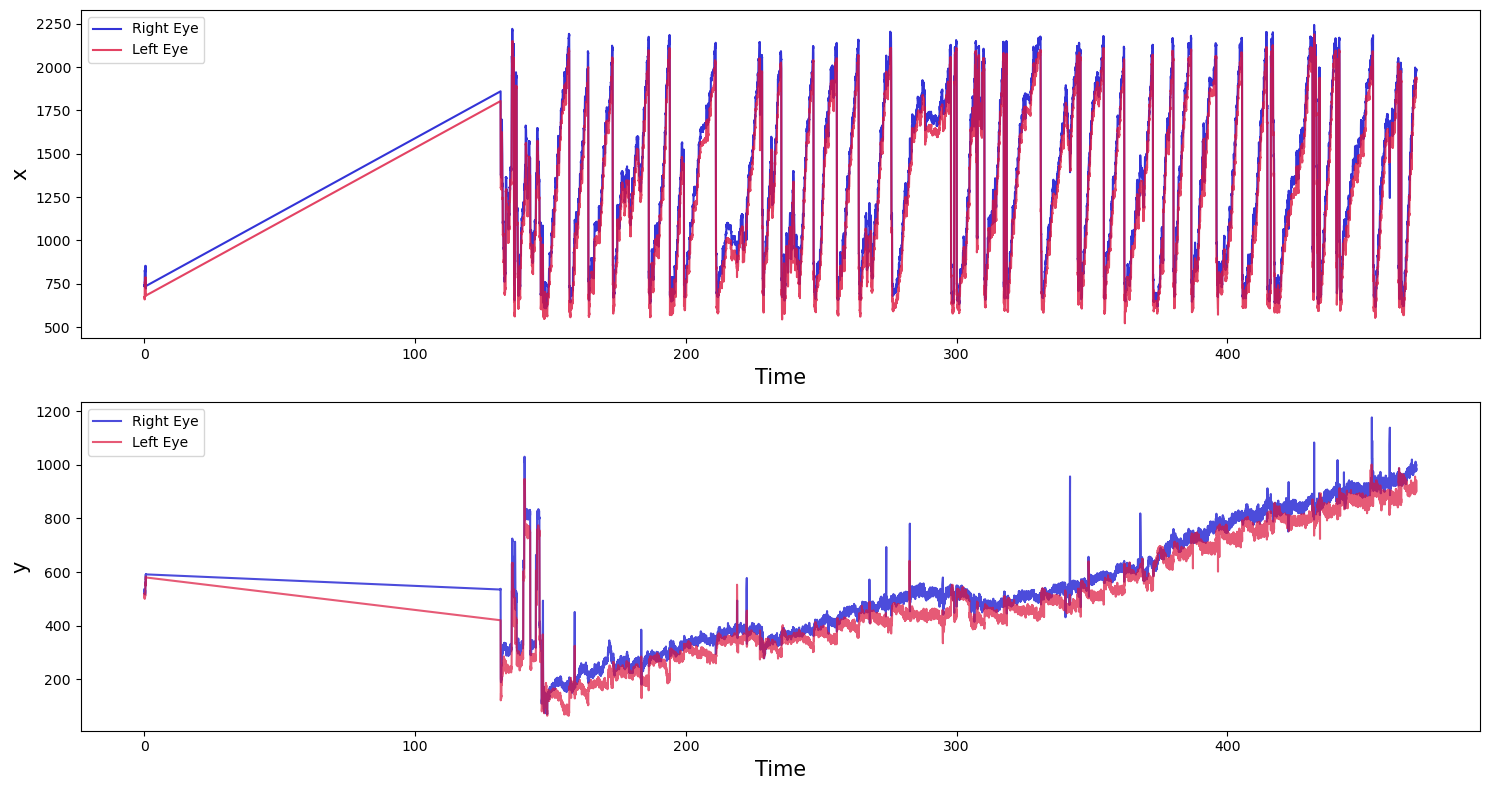

In [293]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [294]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [295]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [296]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [297]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,975.081558,884.726334,269.714613,250.391593
1,0.009969,999.293976,907.972794,273.694925,250.552719
2,0.021962,1016.981125,927.323990,274.445043,244.526160
3,0.032904,1007.219696,922.996216,273.817277,244.239249
4,0.043718,1006.611252,925.411758,270.801058,250.841475
...,...,...,...,...,...
376,4.174565,1784.010468,1699.860382,295.140882,239.179616
377,4.186179,1783.644257,1707.613525,297.645314,236.369734
378,4.197041,1782.464600,1707.899933,298.658266,235.615239
379,4.208014,1791.105957,1714.787598,301.224926,237.286406


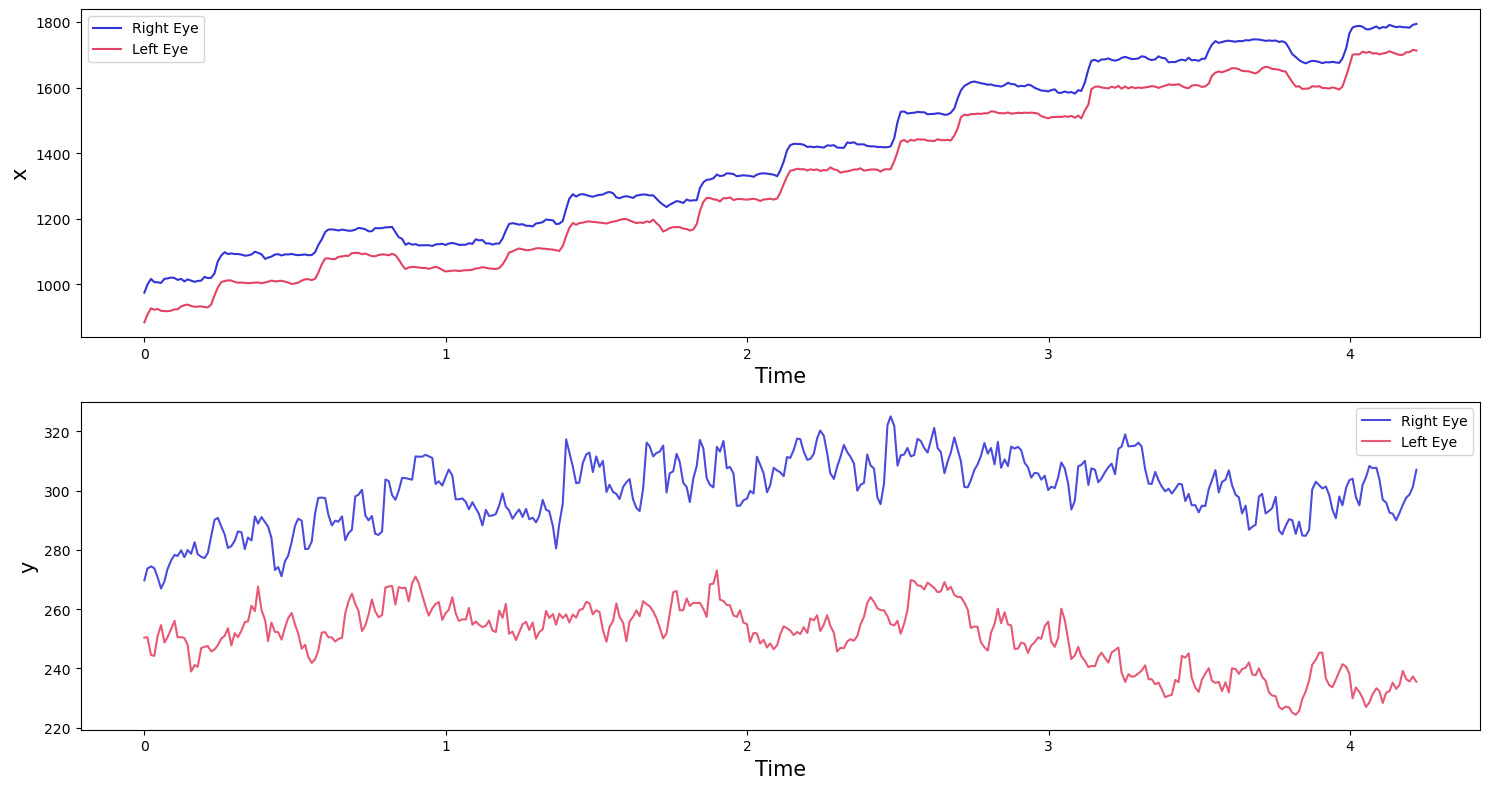

In [298]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


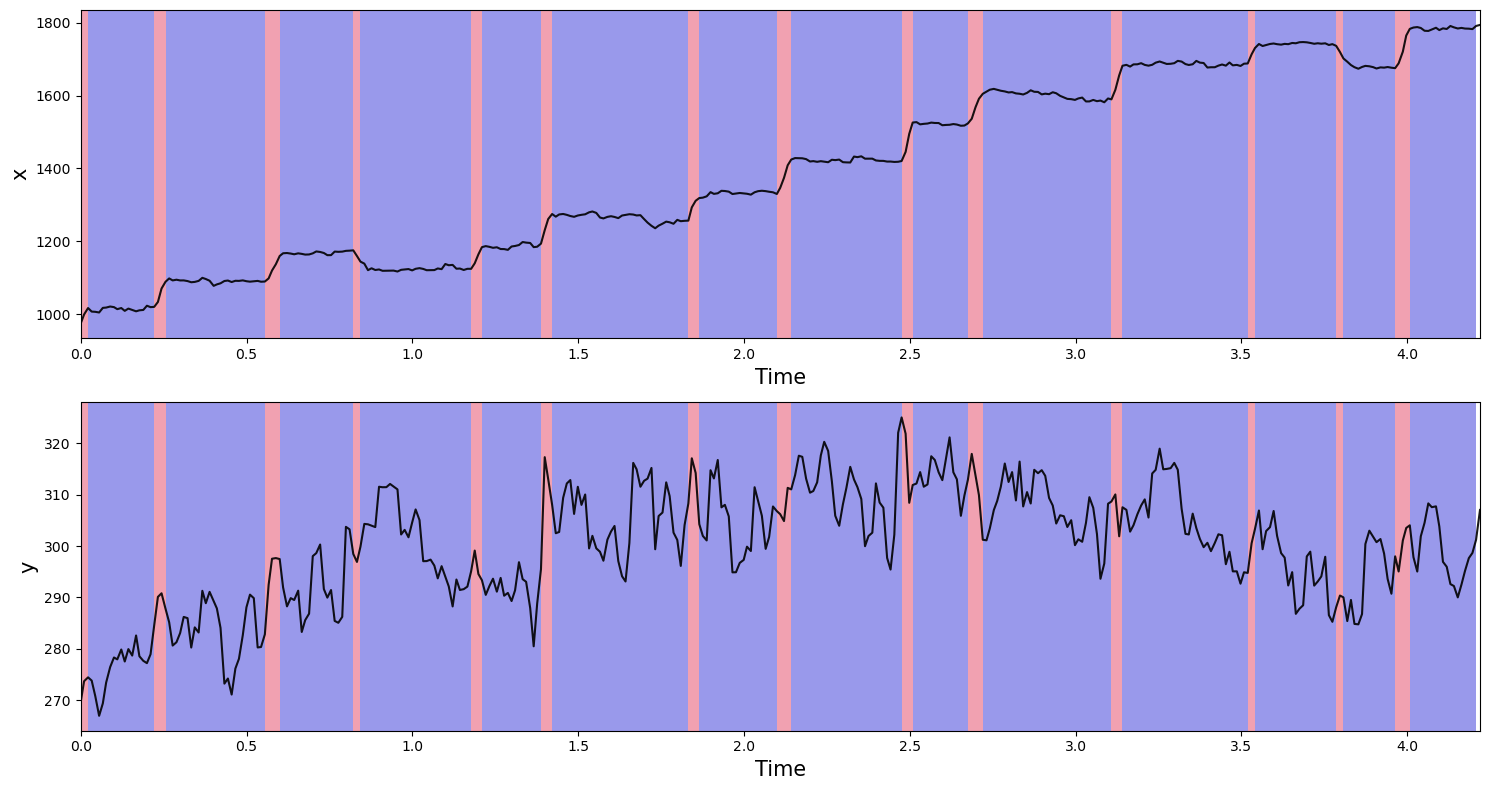

In [299]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [300]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [301]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-24.026676,11.913062,760.325134,47.671093,13.122106,758.868652,0.544876,...,2.263733,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
1,0.010910,1,1,-24.050358,11.912174,760.706726,47.697544,13.114343,759.678162,0.544898,...,2.266495,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
2,0.021358,1,1,-24.066914,11.912716,761.172424,47.697544,13.114343,759.678162,0.544901,...,2.266495,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
3,0.033516,1,1,-24.082457,11.912541,761.485352,47.718235,13.110492,760.067749,0.544912,...,2.271255,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
4,0.044452,1,1,-24.094706,11.916526,761.768860,47.751064,13.108614,760.687256,0.544918,...,2.291306,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2.386375,1,1,-25.417627,12.941292,821.692017,52.546207,14.234733,820.475403,0.543921,...,2.422119,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
181,2.398613,1,1,-25.383081,12.949587,820.837891,52.306366,14.221761,819.710938,0.543906,...,2.444473,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
182,2.409393,1,1,-25.360418,12.955471,820.767639,52.443562,14.266768,819.556763,0.543871,...,2.476379,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0
183,2.419654,1,1,-25.291580,12.961172,822.241516,52.443562,14.266768,819.556763,0.543672,...,2.476379,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Skimming,0


In [302]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [303]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-17.671755,21.731960,721.701294,49.670483,20.569616,720.199829,0.534540,...,2.696045,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,0
1,0.010159,1,1,-17.698795,21.579380,721.634705,49.631058,20.480961,720.155457,0.534600,...,2.699661,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,0
2,0.021372,1,1,-17.782404,21.420193,721.690125,49.537624,20.358677,720.220032,0.534765,...,2.703247,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,0
3,0.031348,1,1,-17.947634,21.173506,721.423706,49.284355,20.149576,719.918152,0.535109,...,2.731339,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,1
4,0.043312,1,1,-18.092159,20.973351,721.460754,49.180702,20.055531,719.952209,0.535397,...,2.736115,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,64.919199,1,1,-21.692259,11.410154,725.879639,46.317329,12.598396,724.689331,0.542421,...,2.351242,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,1
5474,64.930358,1,1,-21.656534,11.397911,725.866699,46.317329,12.598396,724.689331,0.542352,...,2.351242,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,0
5475,64.942538,1,1,-21.619444,11.387215,725.833923,46.371761,12.566767,724.624329,0.542281,...,2.353745,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,0
5476,64.952270,1,1,-21.573298,11.368767,725.561707,46.401024,12.525536,724.325073,0.542206,...,2.334122,True,AI_HC_P02_text.txt,2.0,20.0,Arial,HC,False,Immersive,0


In [304]:
columns_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']

# Drop the columns and assign the result to a new DataFrame
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns=columns_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns=columns_to_drop)

In [305]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [306]:
combined_dataframe = pd.concat(x_data, ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_dataframe.to_csv(f'x_data_{testperson}.csv', index=False)
np.savetxt(f"y_label_{testperson}.csv", y_label, fmt='%s', delimiter=",")
